# Clusterização

Equipe :
    * Jéssica Villar - 1613176
    * Fernando Tancini - 1711799
    * Andrea Mourelo - 1820000

Utilizando o dataset1.csv em anexo e desconsiderando a variável target, façam diferentes clusterizações (variando as features, os algoritmos de clustering e suas configurações). Avaliem cada clusterização individualmente e, ao final, façam uma análise comparativa, discutam os resultados e escolham e justifiquem qual foi a melhor clusterização obtida.

# Considerações iniciais

# Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 0.8)
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn import datasets
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')


# Importando os dados

In [2]:
filename = 'dataset1.csv'
data = pd.read_csv(filename)
del data['target']
data.head()

V1  V2     V3      V4   V5      V6       V7    V8     V9   V10  V11  \
0  18.0   0  6.575  4.0900  296  396.90  0.00632  2.31  0.538  65.2    1   
1   0.0   0  6.421  4.9671  242  396.90  0.02731  7.07  0.469  78.9    2   
2   0.0   0  7.185  4.9671  242  392.83  0.02729  7.07  0.469  61.1    2   
3   0.0   0  6.998  6.0622  222  394.63  0.03237  2.18  0.458  45.8    3   
4   0.0   0  7.147  6.0622  222  396.90  0.06905  2.18  0.458  54.2    3   

    V12   V13  
0  15.3  4.98  
1  17.8  9.14  
2  17.8  4.03  
3  18.7  2.94  
4  18.7  5.33

In [3]:
# sns.pairplot(data)
# plt.show()

Alguns pares de variaveis parecem ter clusters: OU ALGUNS SAO OUTLIERS ??? nseeei
* V1 e V4, V1 e V3, V1 e V5, V1 e V6, V1 e V7, V1 e V8, V1 e V9, V1 e V10, V1 e V12
* V2 e todos os outros
* V3 e V5, V3 e V6, V3 e V7, V3 e V11
* V6 e V7, V6 e V8, V6 e V13
* V8 e V10, V8 e V13

## Análise descritiva

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
V1     506 non-null float64
V2     506 non-null int64
V3     506 non-null float64
V4     506 non-null float64
V5     506 non-null int64
V6     506 non-null float64
V7     506 non-null float64
V8     506 non-null float64
V9     506 non-null float64
V10    506 non-null float64
V11    506 non-null int64
V12    506 non-null float64
V13    506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Todas as colunas do dataframe estão completamente preenchidas e corretamente classificadas ('float','int').

In [5]:
data.describe()

V1          V2          V3          V4          V5          V6  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.363636    0.069170    6.284634    3.795043  408.237154  356.674032   
std     23.322453    0.253994    0.702617    2.105710  168.537116   91.294864   
min      0.000000    0.000000    3.561000    1.129600  187.000000    0.320000   
25%      0.000000    0.000000    5.885500    2.100175  279.000000  375.377500   
50%      0.000000    0.000000    6.208500    3.207450  330.000000  391.440000   
75%     12.500000    0.000000    6.623500    5.188425  666.000000  396.225000   
max    100.000000    1.000000    8.780000   12.126500  711.000000  396.900000   

               V7          V8          V9         V10         V11         V12  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.136779    0.554695   68.574901    9.549407   18.455534   
std      8.601545    6.860353    0.115878   28.148861    8.707259    2.164946   
min      0.006320    0.460000    0.385000    2.900000    1.000000   12.600000   
25%      0.082045    5.190000    0.449000   45.025000    4.000000   17.400000   
50%      0.256510    9.690000    0.538000   77.500000    5.000000   19.050000   
75%      3.677082   18.100000    0.624000   94.075000   24.000000   20.200000   
max     88.976200   27.740000    0.871000  100.000000   24.000000   22.000000   

              V13  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

É no mínimo curioso as variáveis 'V1' e 'V2' apresentarem o primeiro quartil e o segundo quartil iguais a 0.

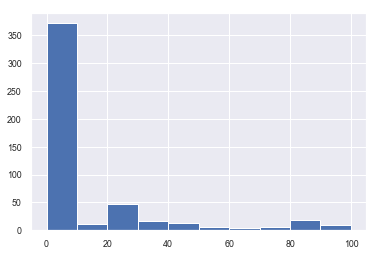

In [6]:
data['V1'].hist()
pass

In [7]:
data['V1'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: V1, dtype: int64

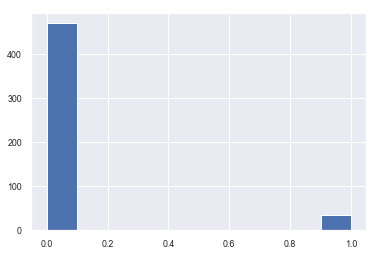

In [8]:
data['V2'].hist()
pass

In [9]:
data['V2'].value_counts()

0    471
1     35
Name: V2, dtype: int64

## Correlação de features

In [10]:
# Calculando a matriz de correlação
corr = data.corr()

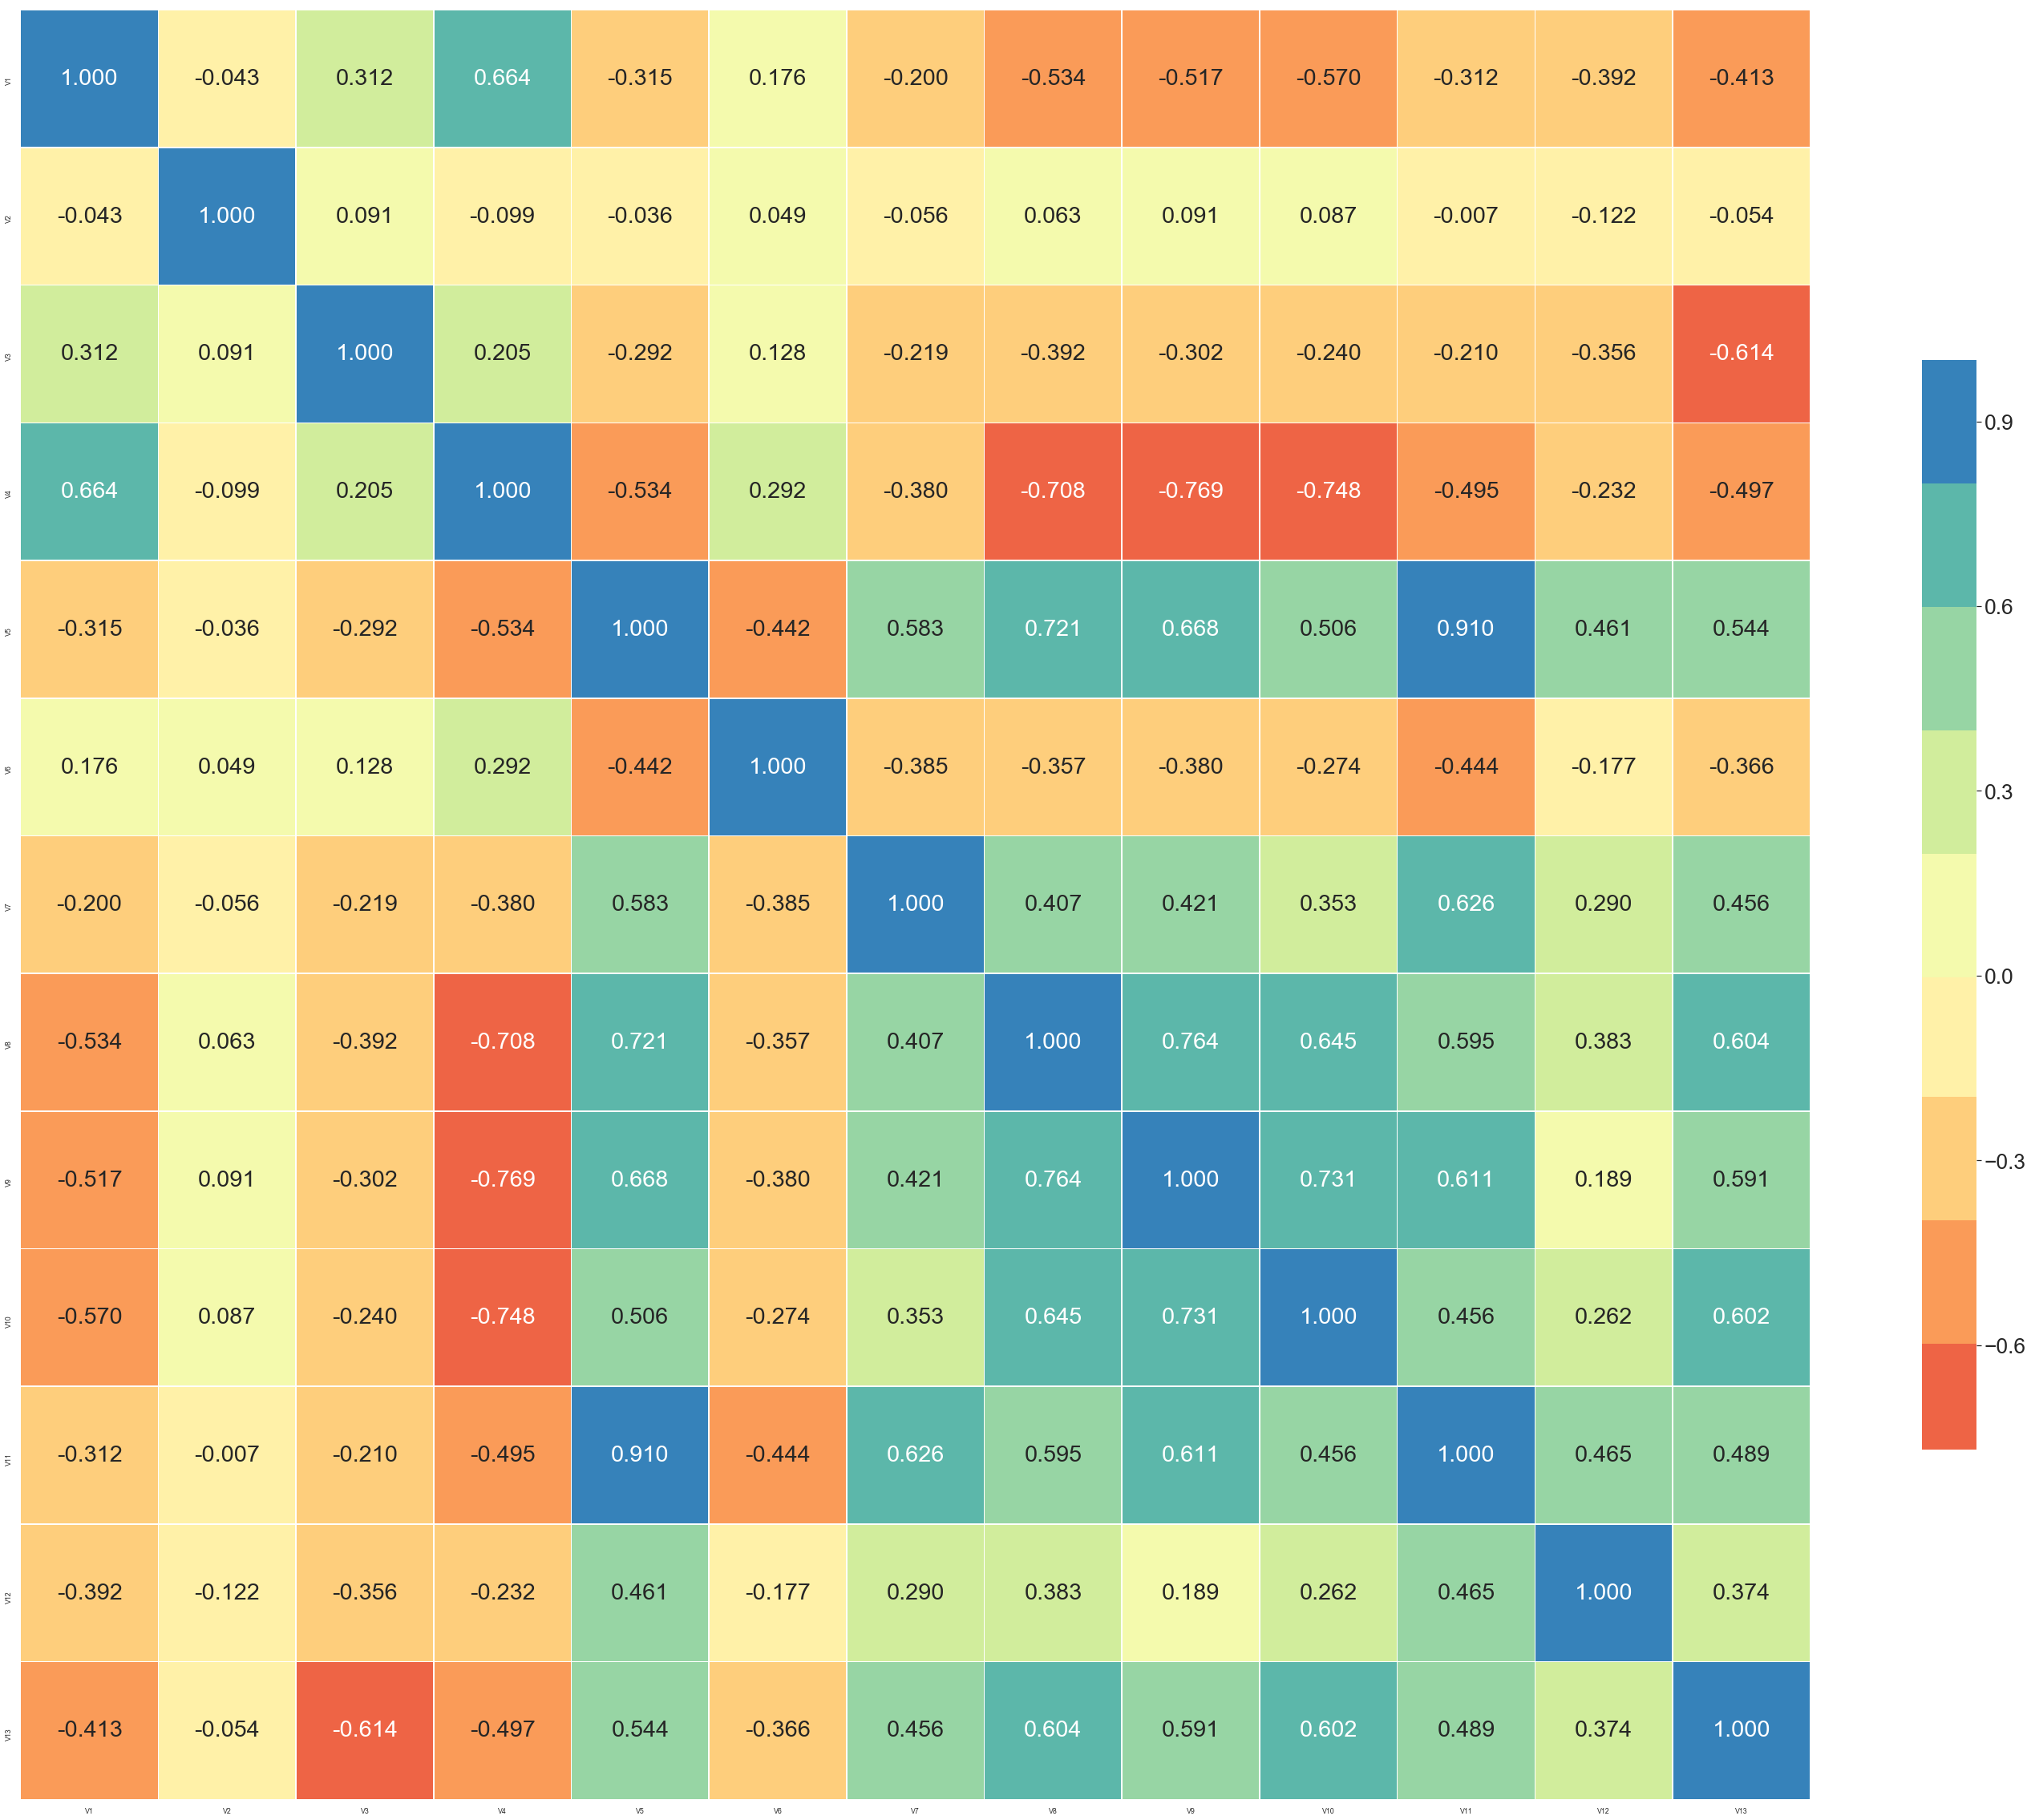

In [11]:
# Montando uma matriz de confusão com as correlações entre todas as variáveis
f, ax = plt.subplots(figsize=(50,50))
cmap = sns.color_palette("Spectral", 10)

sns.set(font_scale=2.4)

ax = sns.heatmap(corr, cmap=cmap, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Algoritmos usados

In [28]:
def eval_k_means(estimator, name, data, k):
    t0 = time()
    estimator.fit(data)
    print('%-10s, k=%d: sil=%0.4f' % (name, k, metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
def ModeloClustering(all_data, data_in, features, showSNS = True, showWorst = True, printIntermediateResults = True):
    np.random.seed(1001001)
    # standardize data
    data_model = scale(data_in)
    all_data_model = scale(all_data)
    #
    sample_size=len(data_in)
    # 
    best_sil = -999
    #
    worst_sil = 999

    best_estimator_is_agg = False
    agg_neigbors = 0
    worst_estimator_is_agg = False
    worst_agg_neigbors = 0
    best_estimator_is_sc = False
    worst_estimator_is_sc = False
    
    # Varias configuraçoes de KMeans
    if (printIntermediateResults) : print('KMeans:')
    for init in ['k-means++', 'random']:
        for k in range(3,8):
            estimator = KMeans(init=init, n_clusters=k, n_init=10, max_iter=100)
            estimator.fit(data_model)
            sil = metrics.silhouette_score(all_data_model, estimator.labels_,
                                              metric='euclidean',
                                              sample_size=sample_size)
            if (printIntermediateResults) : print('%-10s, k=%d: sil=%0.4f' % (init, k, sil))
            if sil > best_sil:
                best_estimator = estimator
                best_sil = sil
            if sil < worst_sil:
                worst_estimator = estimator
                worst_sil = sil

    # Varias configuraçoes de Agglomerative Clustering        
    if (printIntermediateResults) : print('\nAgglomerative Clustering:')
    for nClusters in range(2,5):
        for nNeigbors in range(1,nClusters+1):
            connectivity = kneighbors_graph(data_model, n_neighbors=nNeigbors, include_self=False)
            connectivity = 0.5 * (connectivity + connectivity.T)  # make connectivity symmetric
            estimator = AgglomerativeClustering(n_clusters= nClusters, linkage="average", affinity="cityblock", connectivity=connectivity)
            estimator.fit(data_model)
            sil = metrics.silhouette_score(all_data_model, estimator.labels_,
                                                      metric='euclidean',
                                                      sample_size=sample_size)
            if (printIntermediateResults) : print('clusters=%d, neighbors=%d: sil=%0.4f' % (nClusters, nNeigbors, sil))
            if sil > best_sil:
                best_estimator = estimator
                best_sil = sil
                best_estimator_is_agg = True
                agg_neigbors = nNeigbors
            if sil < worst_sil:
                worst_estimator = estimator
                worst_sil = sil
                worst_estimator_is_agg = True
                worst_agg_neigbors = nNeigbors
    
    # Varias configuraçoes de Spectral Clustering
    if (printIntermediateResults) : print('\nSpectral Clustering:')
    for nClusters in range(2,5):
        estimator = SpectralClustering(n_clusters=nClusters, affinity='nearest_neighbors', assign_labels='kmeans')
        estimator.fit(data_model)
        sil = metrics.silhouette_score(all_data_model, estimator.labels_,
                                              metric='euclidean',
                                              sample_size=sample_size)
        if (printIntermediateResults) : print('clusters=%d, sil=%0.4f' % (nClusters, sil))
        if sil > best_sil:
            best_estimator = estimator
            best_sil = sil
            best_estimator_is_sc = True
        if sil < worst_sil:
            worst_estimator = estimator
            worst_sil = sil
            worst_estimator_is_sc = True
    
    # print best
    if (best_estimator_is_agg):
        print('\nBest estimator silhouette (Agglomerative Clustering): %0.4f with %d clusters and %d neighbors' % (best_sil, best_estimator.n_clusters, agg_neigbors))
    elif (best_estimator_is_sc):
        print('\nBest estimator silhouette (Spectral Clustering): %0.4f with %d clusters' % (best_sil, best_estimator.n_clusters))
    else :
        print('\nBest estimator silhouette: %0.4f (%d clusters, %s)' % (best_sil, best_estimator.n_clusters, best_estimator.init))
    data_in['cluster'] = best_estimator.labels_
    if (showSNS == True):
        plotClusterFromEstimator(data_in, features, best_estimator)
    
    # print worst
    if (showWorst):
        if (worst_estimator_is_agg):
            print('\nWorst estimator silhouette (Agglomerative Clustering): %0.4f with %d clusters and %d neighbors' % (worst_sil, worst_estimator.n_clusters, worst_agg_neigbors))
        elif (worst_estimator_is_sc):
            print('\nWorst estimator silhouette (Spectral Clustering): %0.4f with %d clusters' % (worst_sil, worst_estimator.n_clusters))
        else :
            print('\nWorst estimator silhouette: %0.4f (%d clusters, %s)' % (worst_sil, worst_estimator.n_clusters, worst_estimator.init))
        data_in_cp = data_in.copy()
        data_in_cp['cluster'] = worst_estimator.labels_
        if (showSNS == True):
            plotClusterFromEstimator(data_in_cp, features, worst_estimator)
    return (best_estimator, worst_estimator)

def plotClusterFromEstimator(data_in, features, estimator):
    sns.pairplot(data=data_in, vars=features, hue='cluster')
    sns.set(font_scale = 1)
    plt.figsize=(30,30)
    plt.show()

#### Exemplo

KMeans:
k-means++ , k=3: sil=0.1757
k-means++ , k=4: sil=0.1352
k-means++ , k=5: sil=0.0877
k-means++ , k=6: sil=0.0866
k-means++ , k=7: sil=0.0812
random    , k=3: sil=0.1757
random    , k=4: sil=0.1348
random    , k=5: sil=0.0909
random    , k=6: sil=0.0840
random    , k=7: sil=0.0812

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.3498
clusters=2, neighbors=2: sil=0.3534
clusters=3, neighbors=1: sil=0.1829
clusters=3, neighbors=2: sil=0.2194
clusters=3, neighbors=3: sil=-0.0129
clusters=4, neighbors=1: sil=0.1700
clusters=4, neighbors=2: sil=0.1987
clusters=4, neighbors=3: sil=-0.1824
clusters=4, neighbors=4: sil=-0.1866

Spectral Clustering:
clusters=2, sil=0.3454
clusters=3, sil=0.1536
clusters=4, sil=0.1449

Best estimator silhouette (Agglomerative Clustering): 0.3534 with 2 clusters and 2 neighbors


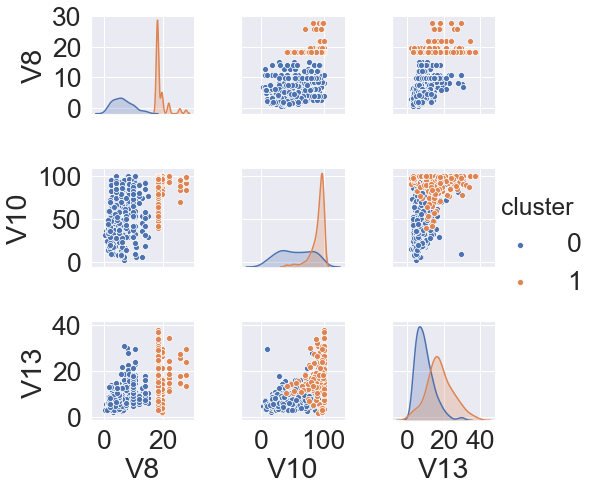


Worst estimator silhouette (Agglomerative Clustering): -0.1866 with 4 clusters and 4 neighbors


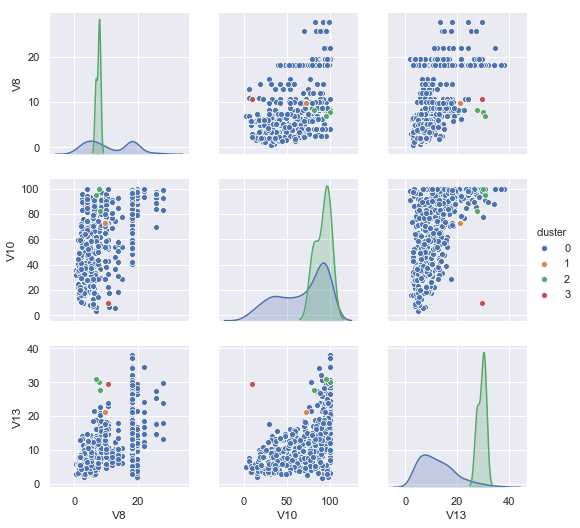

In [14]:
features = ['V8','V10','V13']
data_model_exemplo = data[features]
(modelo_exemplo, _) = ModeloClustering(data, data_model_exemplo, features)
#print(data_model_exemplo)

## Modelo 1
### Todas as features

In [15]:
features = list(data.columns)
data_model1 = data.copy()
(modelo1, _) = ModeloClustering(data, data_model1, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.2574
k-means++ , k=4: sil=0.2898
k-means++ , k=5: sil=0.2478
k-means++ , k=6: sil=0.2922
k-means++ , k=7: sil=0.2698
random    , k=3: sil=0.2574
random    , k=4: sil=0.2898
random    , k=5: sil=0.2478
random    , k=6: sil=0.2965
random    , k=7: sil=0.2538

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.3534
clusters=2, neighbors=2: sil=0.3437
clusters=3, neighbors=1: sil=0.3027
clusters=3, neighbors=2: sil=0.3191
clusters=3, neighbors=3: sil=0.1730
clusters=4, neighbors=1: sil=0.3042
clusters=4, neighbors=2: sil=0.2373
clusters=4, neighbors=3: sil=0.2298
clusters=4, neighbors=4: sil=0.0024

Spectral Clustering:
clusters=2, sil=0.0239
clusters=3, sil=0.1839
clusters=4, sil=0.2511

Best estimator silhouette (Agglomerative Clustering): 0.3534 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.0024 with 4 clusters and 4 neighbors


=> Silhouette ainda pior com todas as features

## Modelo 2

### Apenas features pouco correlacionadas

In [16]:
# Calculando a matriz de correlação
corr = data.corr()
predictors = []
for label, content in corr.iteritems():

    for element in content:
        if ( (element < 0.01) & (element > -0.01)):
            predictors.append([label, content[content == element].index[0], element])
print(predictors)

[['V2', 'V11', -0.007368240886077726], ['V11', 'V2', -0.007368240886077726]]


In [17]:
features = ['V2','V11']
data_model2 = data[features].copy()
(modelo2, _) = ModeloClustering(data, data_model2, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.3480
k-means++ , k=4: sil=0.3217
k-means++ , k=5: sil=0.1231
k-means++ , k=6: sil=0.0696
k-means++ , k=7: sil=0.0814
random    , k=3: sil=0.3480
random    , k=4: sil=0.3217
random    , k=5: sil=0.1231
random    , k=6: sil=0.0696
random    , k=7: sil=0.0514

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.2571
clusters=2, neighbors=2: sil=0.2571
clusters=3, neighbors=1: sil=0.3480
clusters=3, neighbors=2: sil=0.3480
clusters=3, neighbors=3: sil=0.3480
clusters=4, neighbors=1: sil=0.3217
clusters=4, neighbors=2: sil=0.3217
clusters=4, neighbors=3: sil=0.3217
clusters=4, neighbors=4: sil=0.3217

Spectral Clustering:
clusters=2, sil=0.2756
clusters=3, sil=0.0856
clusters=4, sil=-0.1299

Best estimator silhouette: 0.3480 (3 clusters, random)

Worst estimator silhouette (Spectral Clustering): -0.1299 with 4 clusters


## Redução de dimensionalidade

### PCA - Principal Composant Analysis

In [18]:
from sklearn.decomposition import PCA

In [19]:
def setPCA(data, nDimensions, columns):
    # Precisamos normalizar os dados para usar PCA
    data_scaled = scale(data)
    pca = PCA(n_components=nDimensions)
    principalComponents = pca.fit_transform(data_scaled)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
    return principalDf

#### 2 dimensões

In [20]:
nDimensions = 2
columns = ['Principal Component 1', 'Principal Component 2']
pca2 = setPCA(data,nDimensions,columns)
pca2.head()

Principal Component 1  Principal Component 2
0              -2.098297               0.773112
1              -1.457252               0.591985
2              -2.074598               0.599639
3              -2.611504              -0.006871
4              -2.458185               0.097712

In [21]:
# Aplicando modelos
features = list(pca2.columns)
data_model_pca2 = pca2.copy()
(modelo_pca2, _) = ModeloClustering(data, data_model_pca2, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.2341
k-means++ , k=4: sil=0.2394
k-means++ , k=5: sil=0.2152
k-means++ , k=6: sil=0.2361
k-means++ , k=7: sil=0.1835
random    , k=3: sil=0.2341
random    , k=4: sil=0.2406
random    , k=5: sil=0.2142
random    , k=6: sil=0.2337
random    , k=7: sil=0.1852

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.2214
clusters=2, neighbors=2: sil=0.1851
clusters=3, neighbors=1: sil=0.2337
clusters=3, neighbors=2: sil=0.1267
clusters=3, neighbors=3: sil=0.1770
clusters=4, neighbors=1: sil=0.2488
clusters=4, neighbors=2: sil=0.2459
clusters=4, neighbors=3: sil=0.1701
clusters=4, neighbors=4: sil=0.1857

Spectral Clustering:
clusters=2, sil=0.3507
clusters=3, sil=0.2317
clusters=4, sil=0.2482

Best estimator silhouette (Agglomerative Clustering): 0.3507 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.1267 with 3 clusters and 2 neighbors


0    327
1    179
Name: cluster, dtype: int64


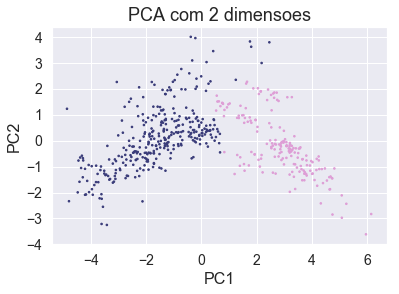

In [22]:
fig,ax = plt.subplots()
plt.scatter(x=data_model_pca2['Principal Component 1'], y=data_model_pca2['Principal Component 2'], marker='.', c=modelo_pca2.labels_, cmap='tab20b', s=10, alpha=1.0)
ax.set_xlabel('PC1', fontsize = 16)
ax.set_ylabel('PC2', fontsize = 16)
ax.set_title('PCA com 2 dimensoes', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print(data_model_pca2.cluster.value_counts())
plt.show()

#### 3 dimensões

In [23]:
nDimensions = 3
columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
pca3 = setPCA(data,nDimensions,columns)
# Aplicando modelos
features = list(pca3.columns)
data_model_pca3 = pca3.copy()
(modelo_pca3, _) = ModeloClustering(data, data_model_pca3, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.2952
k-means++ , k=4: sil=0.2557
k-means++ , k=5: sil=0.2059
k-means++ , k=6: sil=0.2075
k-means++ , k=7: sil=0.2043
random    , k=3: sil=0.2963
random    , k=4: sil=0.2565
random    , k=5: sil=0.2050
random    , k=6: sil=0.2106
random    , k=7: sil=0.2054

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.4733
clusters=2, neighbors=2: sil=0.4733
clusters=3, neighbors=1: sil=0.1699
clusters=3, neighbors=2: sil=0.1563
clusters=3, neighbors=3: sil=0.2866
clusters=4, neighbors=1: sil=0.1863
clusters=4, neighbors=2: sil=0.1860
clusters=4, neighbors=3: sil=0.2672
clusters=4, neighbors=4: sil=0.1957

Spectral Clustering:
clusters=2, sil=0.3386
clusters=3, sil=0.2331
clusters=4, sil=0.2234

Best estimator silhouette (Agglomerative Clustering): 0.4733 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.1563 with 3 clusters and 2 neighbors


0    502
1      4
Name: cluster, dtype: int64


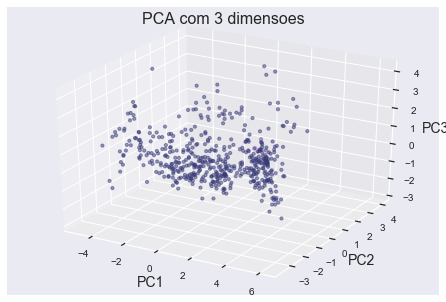

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_model_pca3['Principal Component 1'],data_model_pca3['Principal Component 2'],data_model_pca3['Principal Component 3'],c=modelo_pca3.labels_, cmap='tab20b', s=10, alpha=0.5)
ax.set_xlabel('PC1', fontsize = 14)
ax.set_ylabel('PC2', fontsize = 14)
ax.set_zlabel('PC3', fontsize = 14)
ax.set_title('PCA com 3 dimensoes', fontsize = 16)
ax.tick_params(axis='both',labelsize=10)
print(data_model_pca3.cluster.value_counts())
ax.view_init(30)
plt.draw()

#### de 4 até 10 dimensões

### Considerações finais (PCA)

nDimensions =  4

Best estimator silhouette: 0.3505 (3 clusters, k-means++)


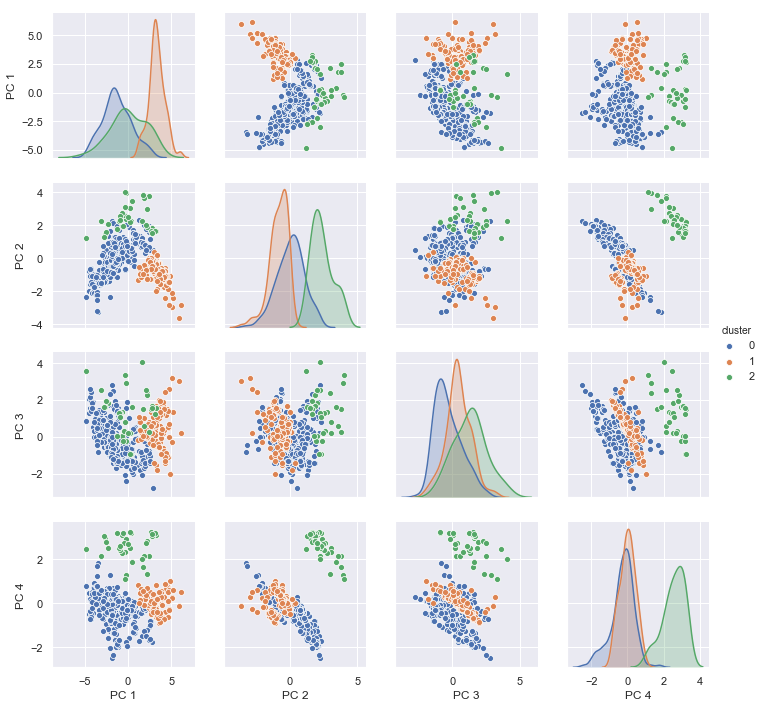



nDimensions =  5

Best estimator silhouette: 0.3480 (3 clusters, k-means++)


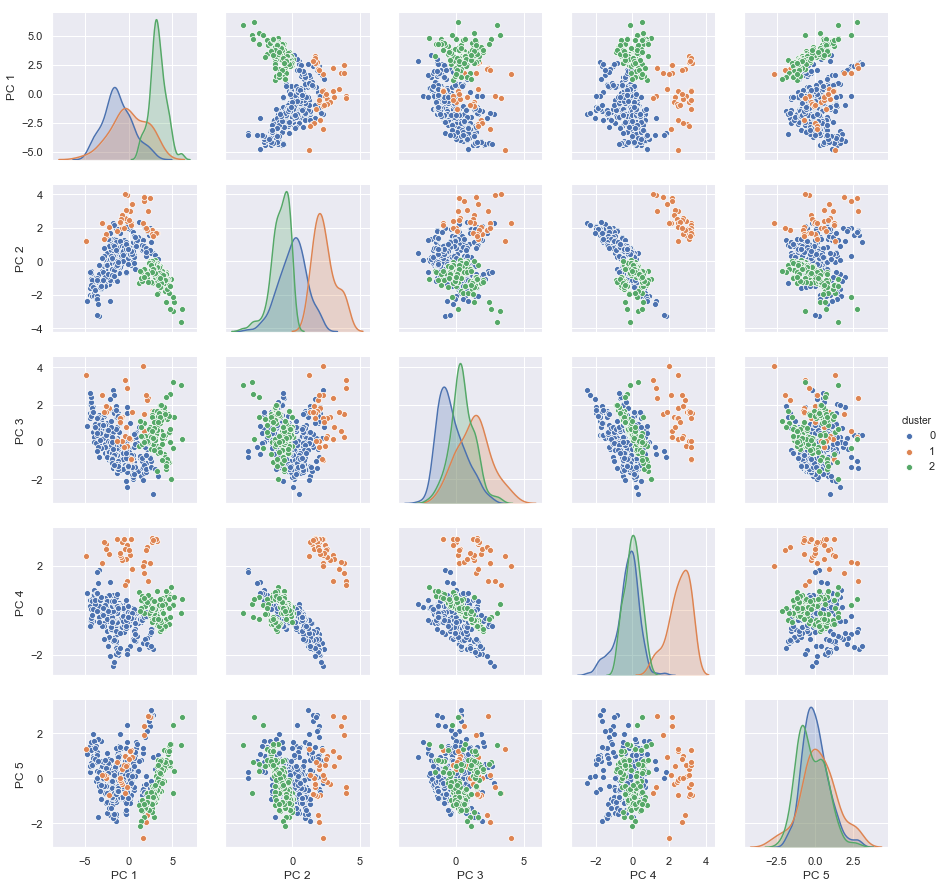



nDimensions =  6

Best estimator silhouette (Spectral Clustering): 0.3474 with 3 clusters


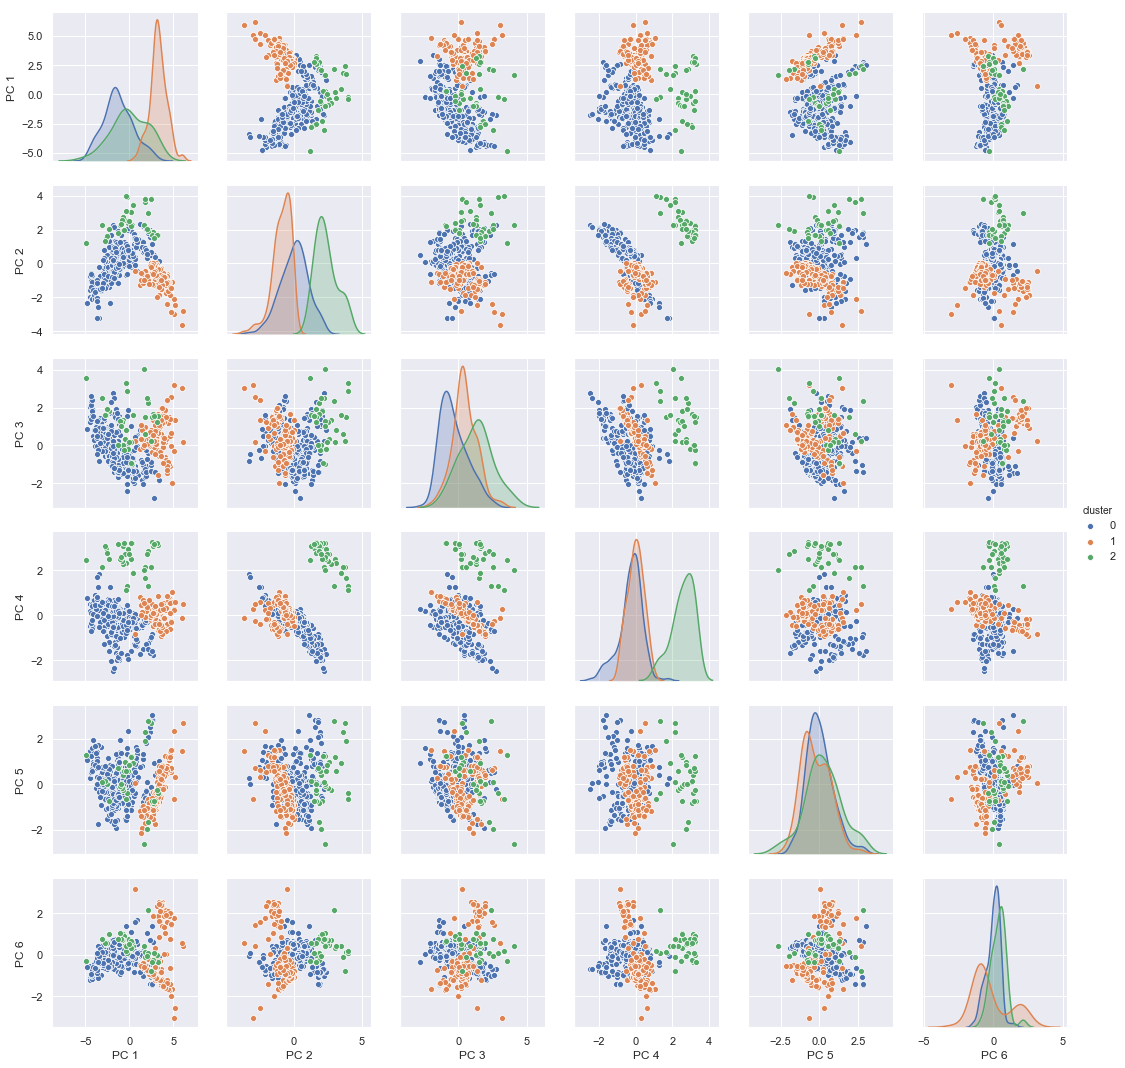



nDimensions =  7

Best estimator silhouette (Agglomerative Clustering): 0.5640 with 2 clusters and 2 neighbors


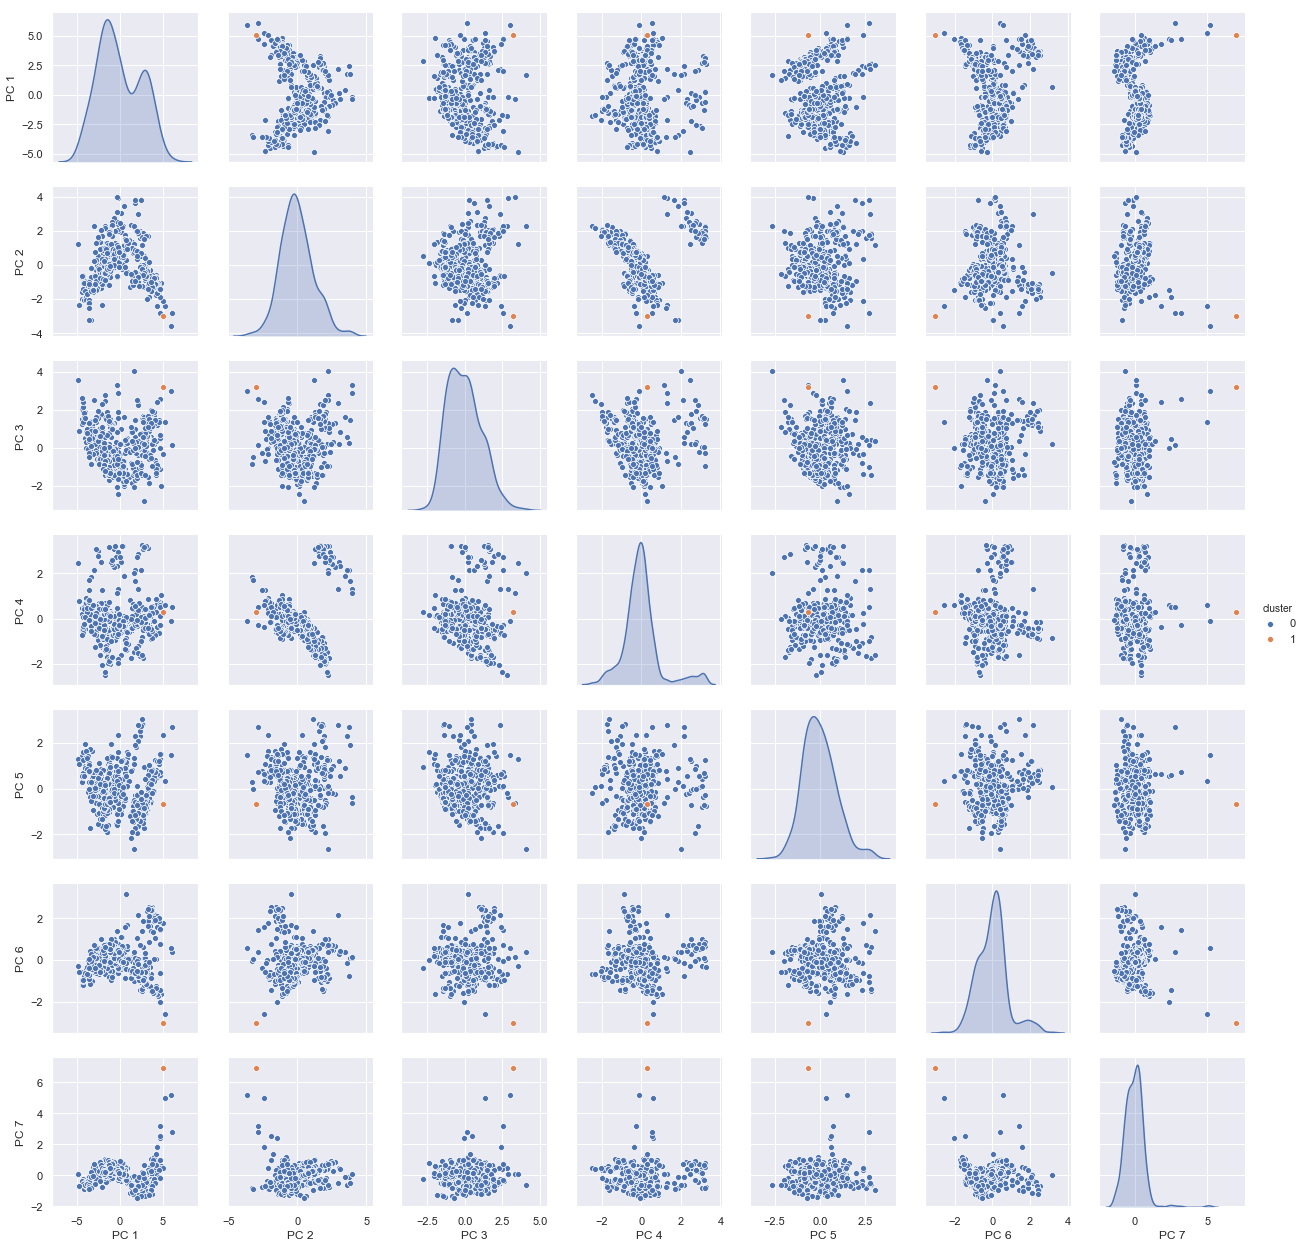



nDimensions =  8

Best estimator silhouette (Agglomerative Clustering): 0.5219 with 2 clusters and 1 neighbors


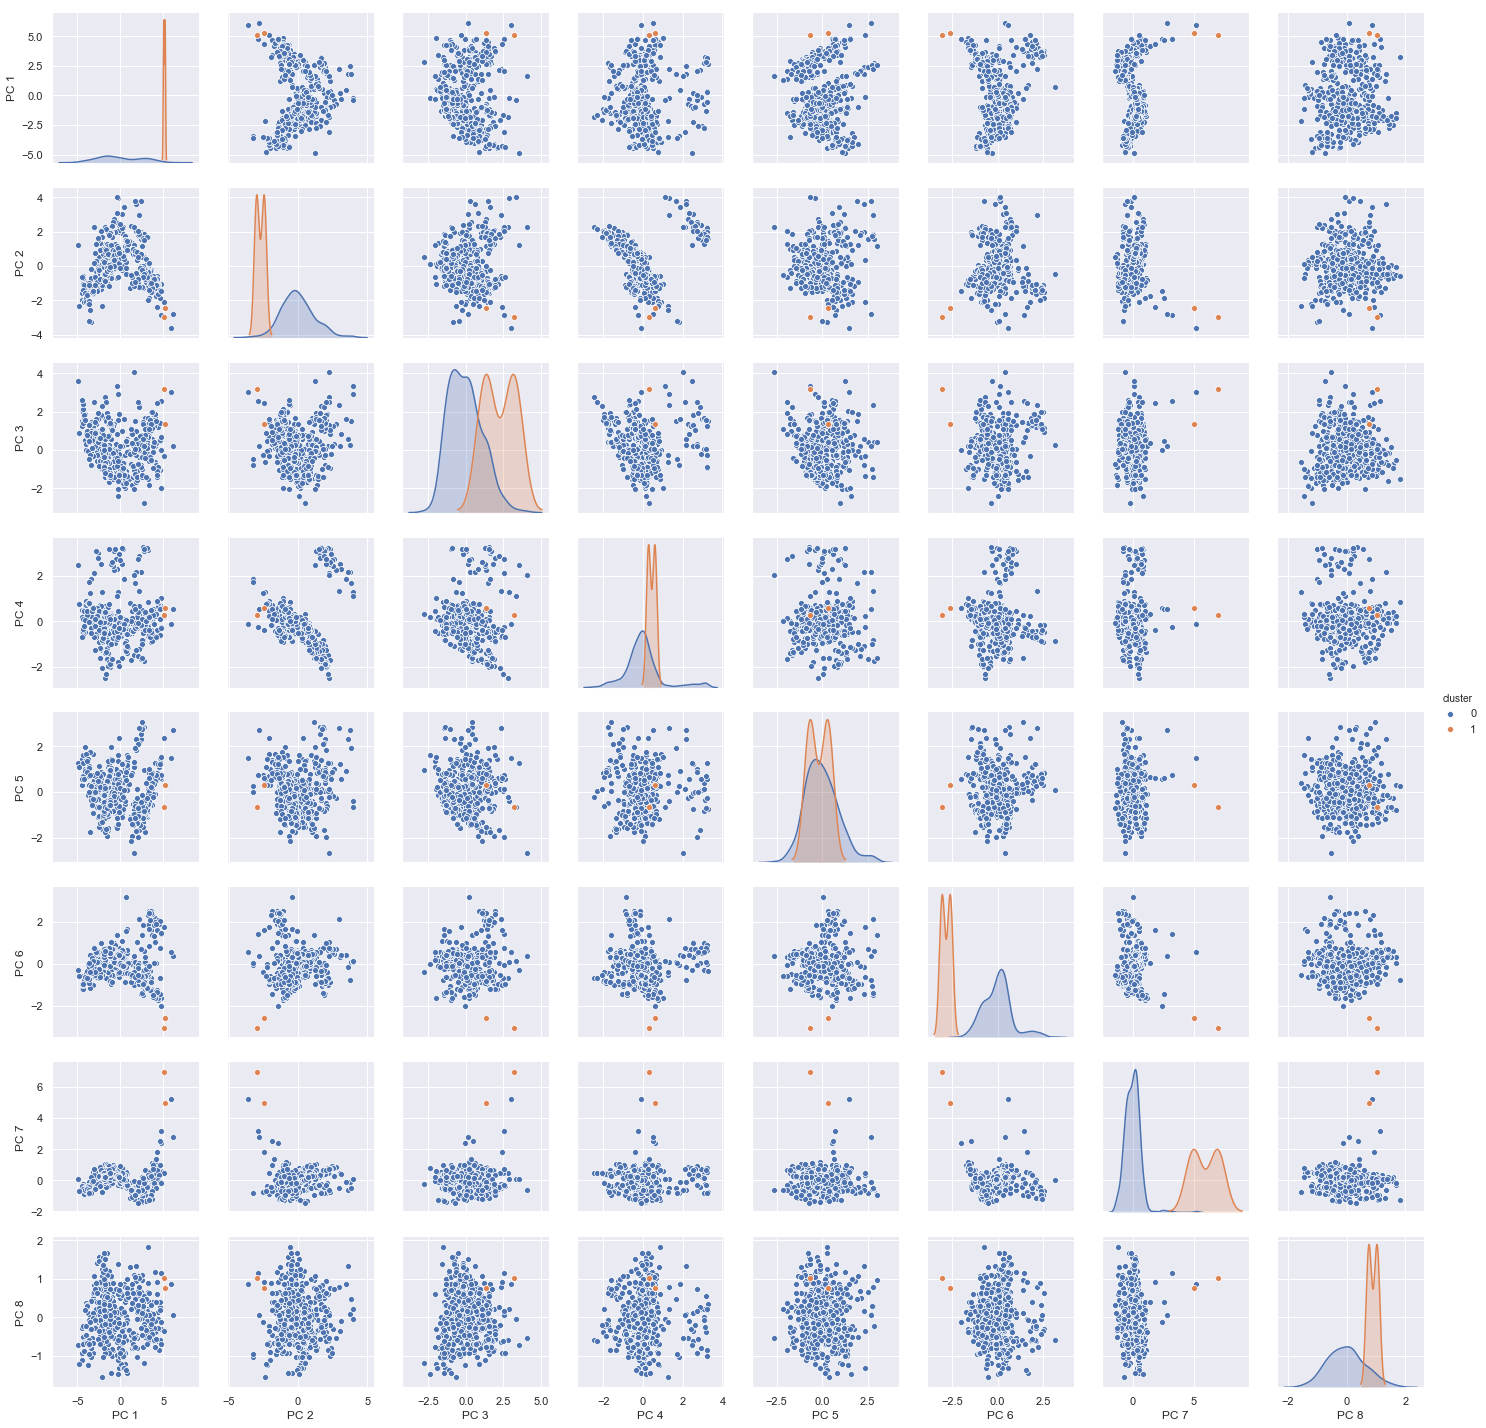



nDimensions =  9

Best estimator silhouette (Agglomerative Clustering): 0.5640 with 2 clusters and 2 neighbors


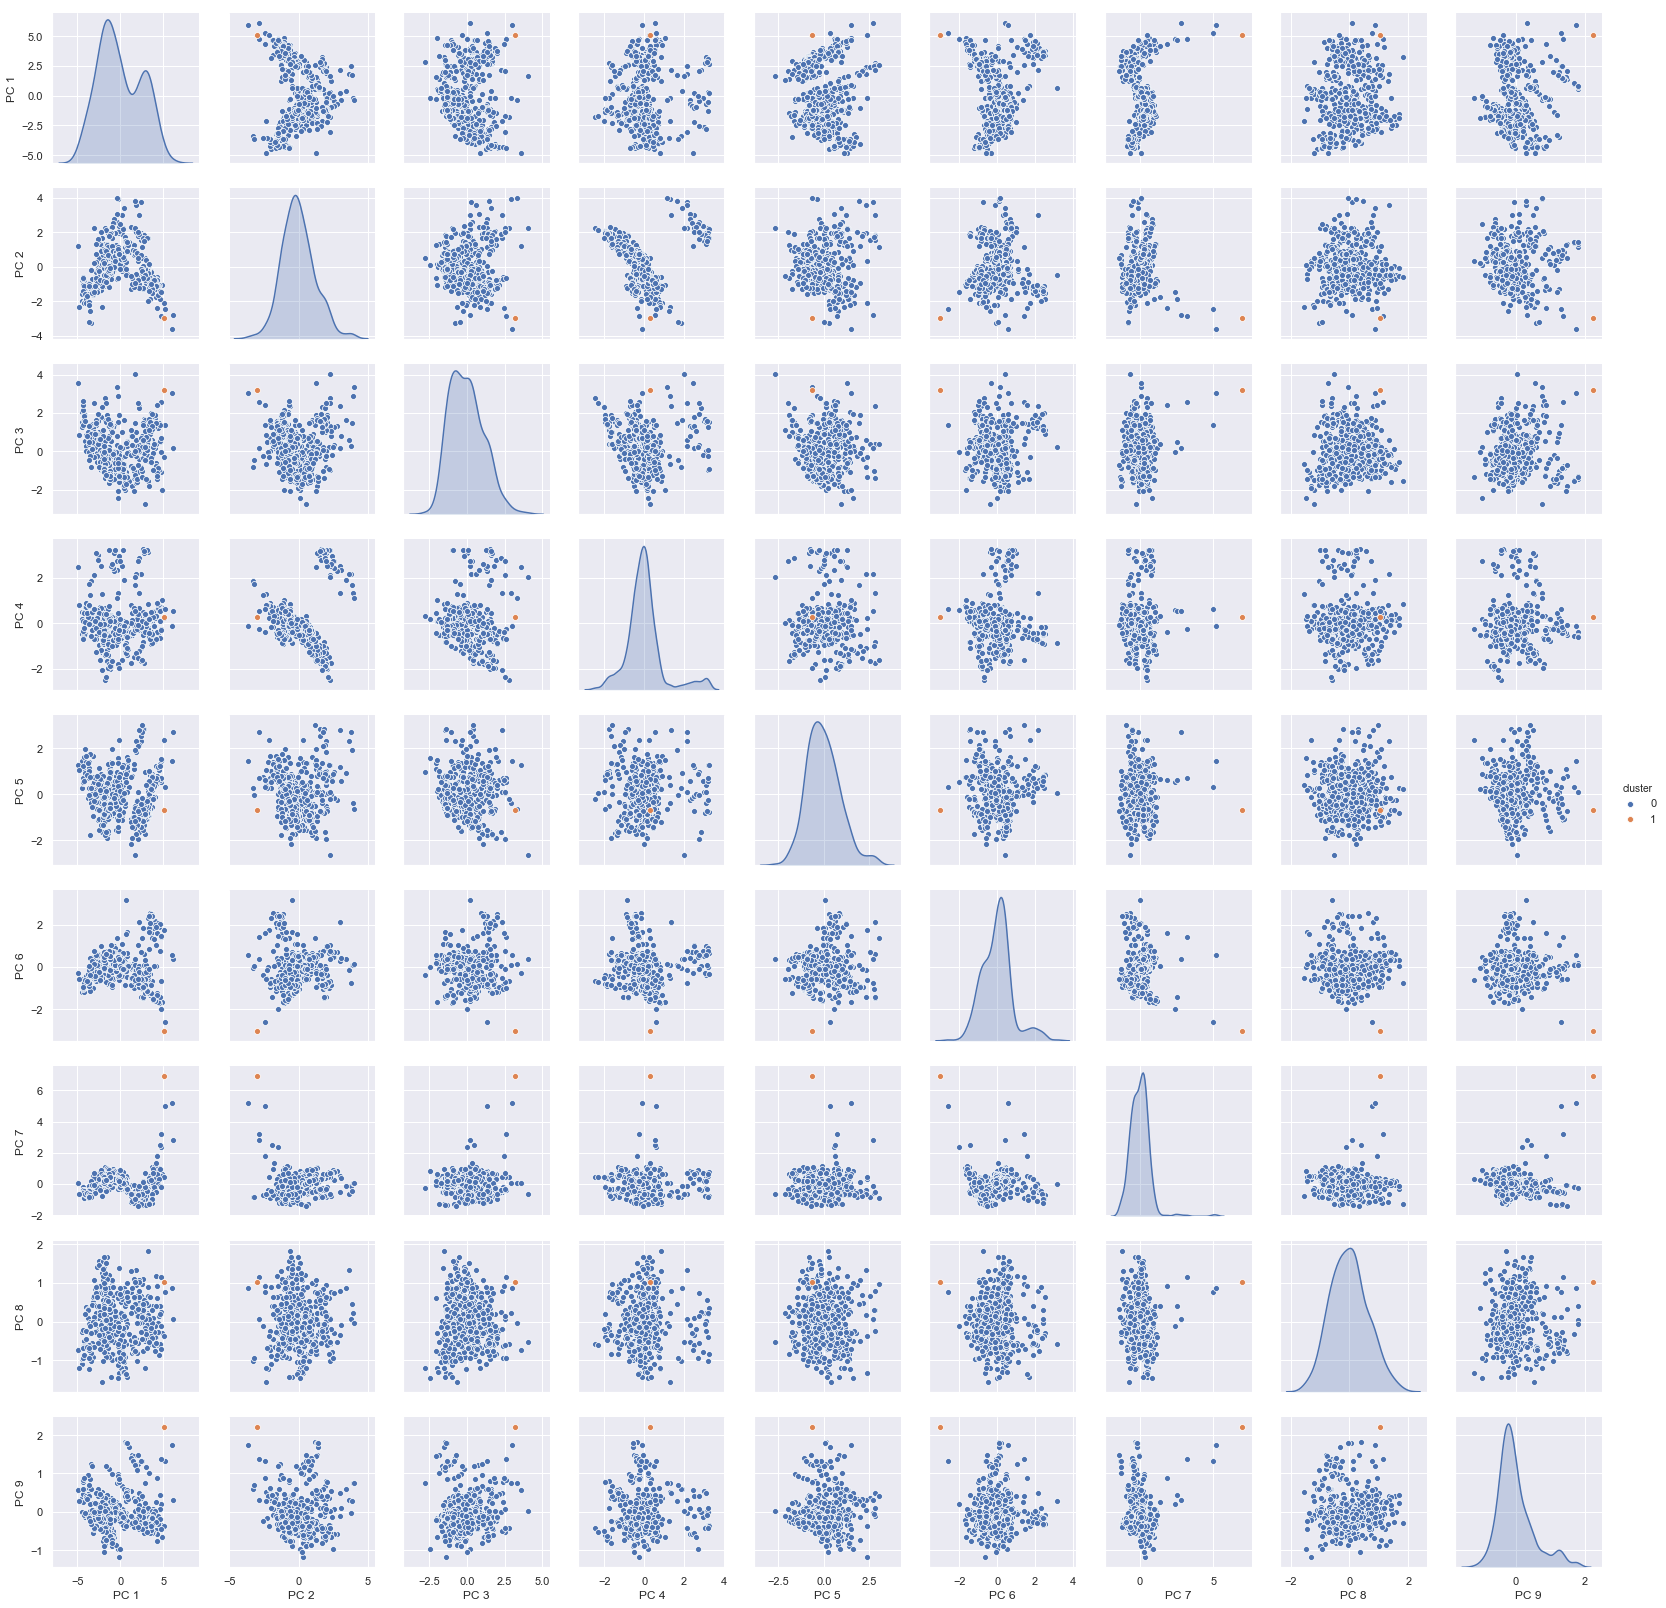



nDimensions =  10

Best estimator silhouette (Agglomerative Clustering): 0.5219 with 2 clusters and 1 neighbors


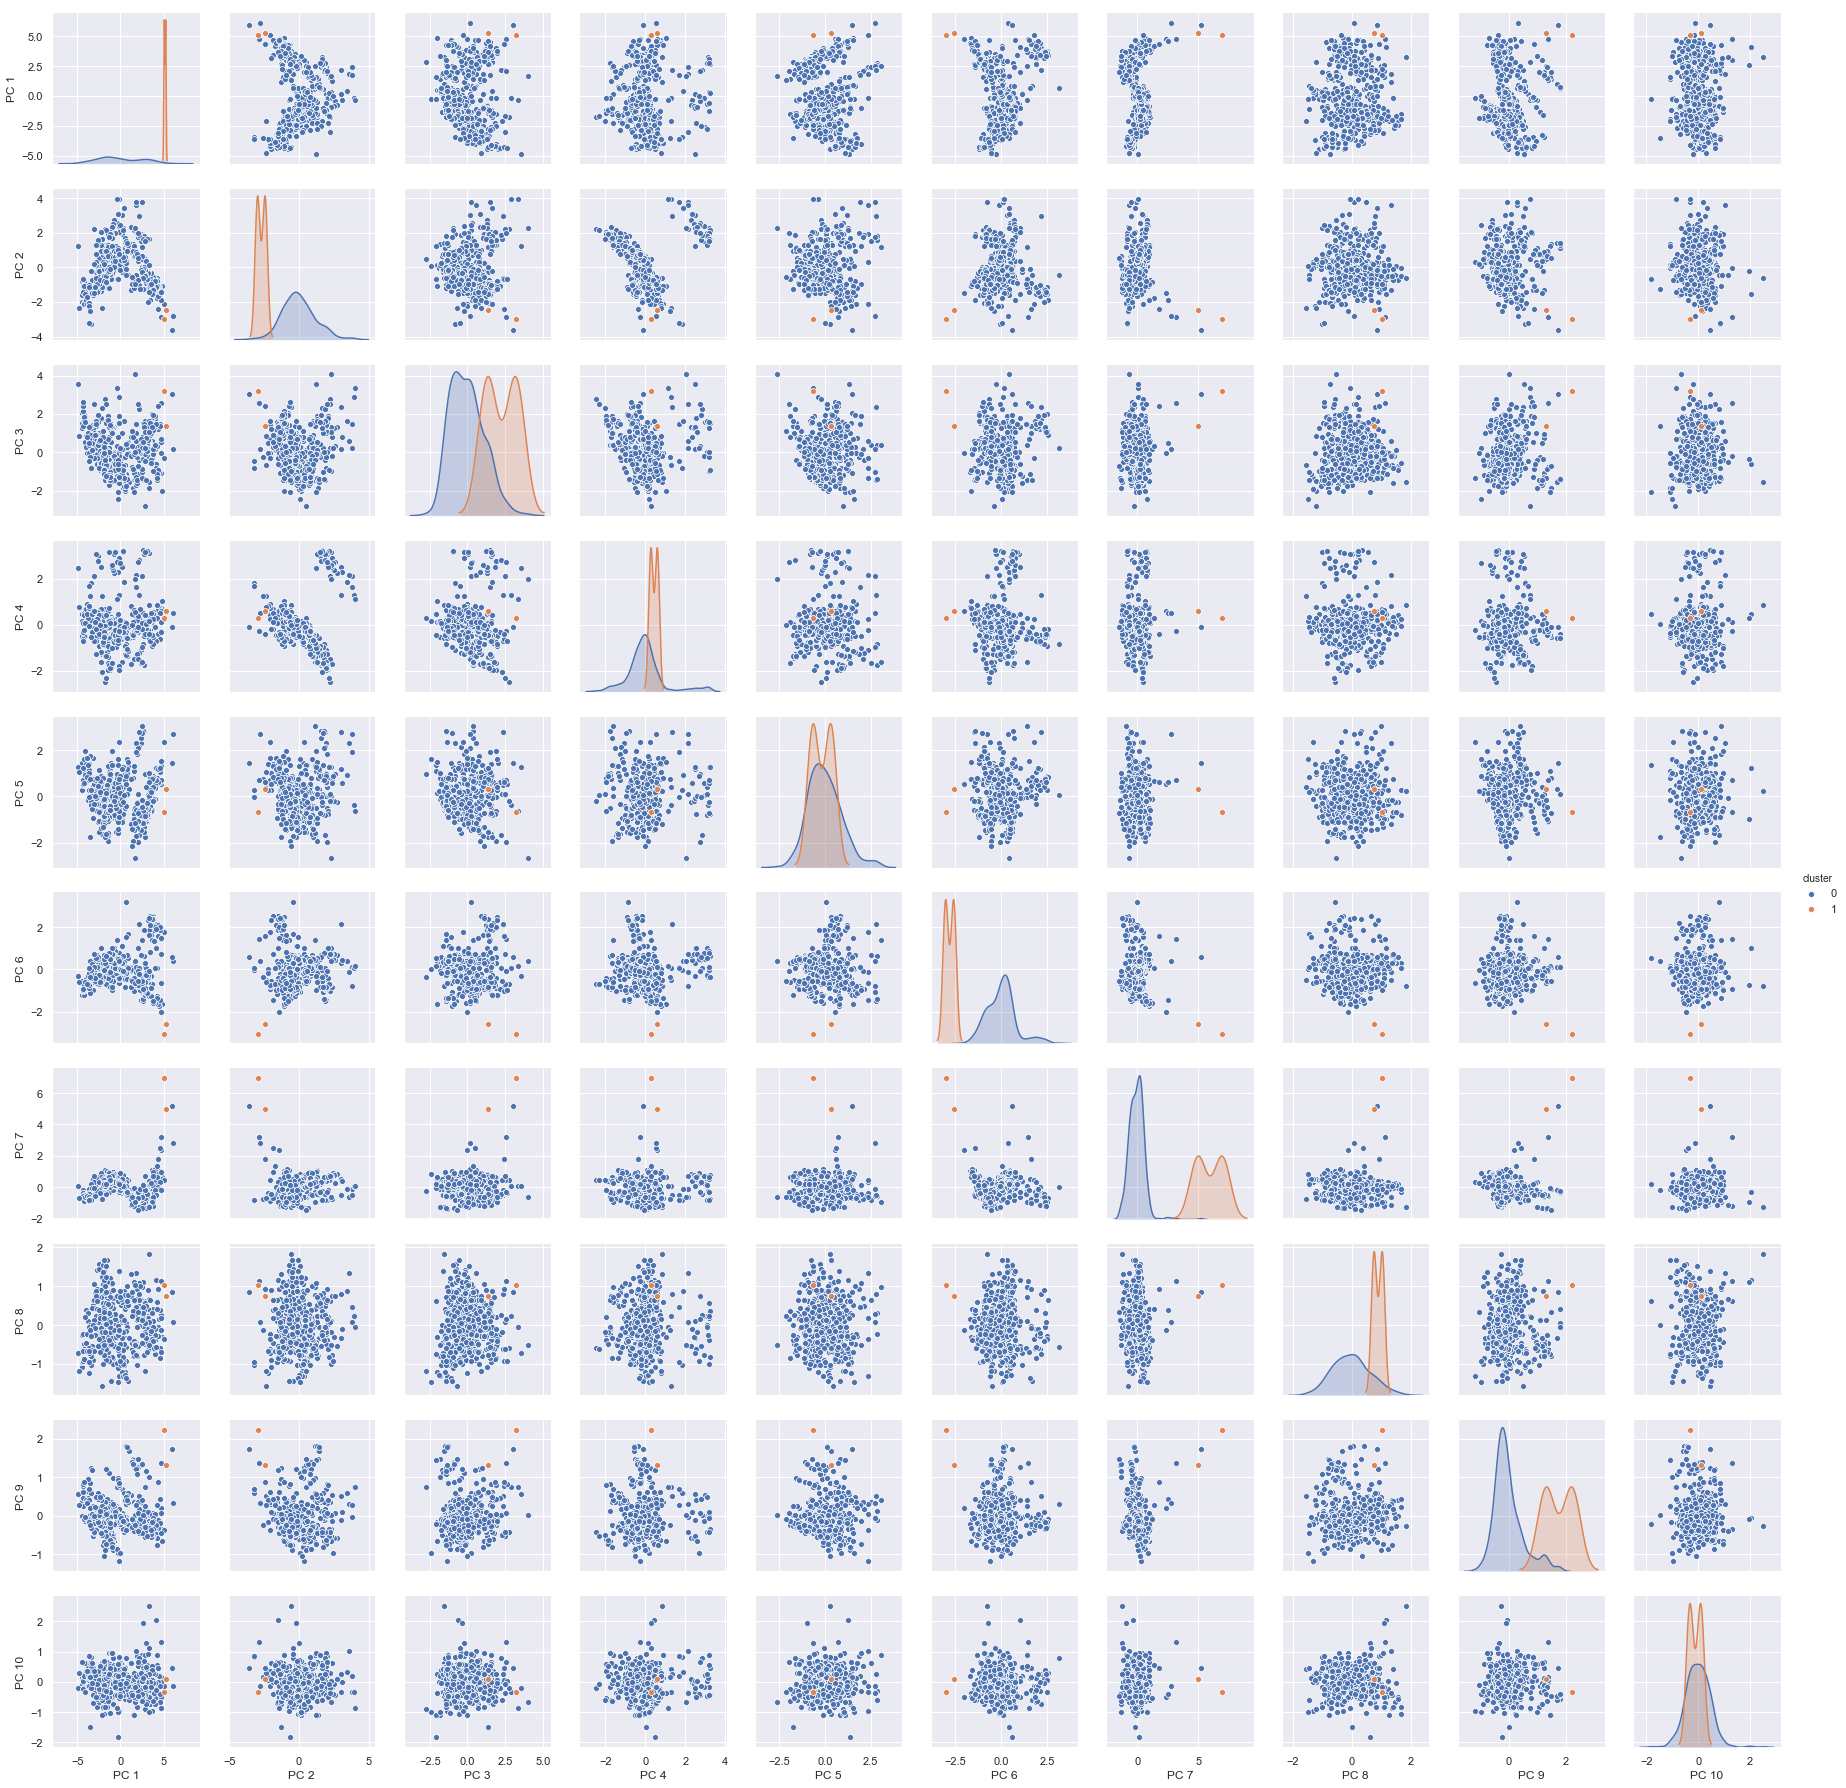

In [27]:
columns = ['PC 1', 'PC 2', 'PC 3']
modelo_pcai = list(range(11))
features_pca_i = list(range(11))
data_model_pca_i = list(range(11))
for i in range(4,11):
    nDimensions = i
    column = 'PC ' + str(i)
    columns.append(column)
    pca_i = setPCA(data,nDimensions,columns)
    # Aplicando modelos
    features_pca_i[i] = list(pca_i.columns)
    data_model_pca_i[i] = pca_i.copy()
    print('nDimensions = ', nDimensions)
    (modelo_pcai[i], _) = ModeloClustering(data, data_model_pca_i[i], features_pca_i[i], showSNS = True, showWorst = False, printIntermediateResults = False)
    print('\n')

In [26]:
# plotClusterFromEstimator(data_model_pca_i[7], features_pca_i[7], modelo_pcai[7])

# Conclusão